# Notebook oficial - TP Datos

In [1]:
# Importando librerias
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import warnings

In [2]:
#Carga del dataset
df_tweets = pd.read_csv('data/train.csv')
#Dimension
print('La dimension del dataset es: ',df_tweets.shape[0], 'registros,', df_tweets.shape[1],'columnas')
# Vista de los primeros registros
df_tweets.head(5)
# Data:
# id - identificador unico para cada tweet
# keyword - un keyword para el tweet (podría faltar)
# location - ubicación desde donde fue enviado (podría no estar)
# text - el texto del tweet
# target - indica si se trata de un desastre real (1) o no (0)

La dimension del dataset es:  7613 registros, 5 columnas


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
#Definición de tipos
df_tweets['id'] = df_tweets['id'].astype(int)
df_tweets['keyword'] = df_tweets['keyword'].astype('string')
df_tweets['location'] = df_tweets['location'].astype('string')
df_tweets['text'] = df_tweets['text'].astype('string')
df_tweets['target'] = df_tweets['target'].astype('bool')

In [4]:
#Elimino duplicados
df_tweets.drop_duplicates(inplace=True)

In [5]:
df_tweets.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613
unique,NaN,221,3341,7503,2
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,False
freq,NaN,45,104,10,4342
mean,5441.934848,NaN,NaN,NaN,NaN
std,3137.116090,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,2734.000000,NaN,NaN,NaN,NaN
50%,5408.000000,NaN,NaN,NaN,NaN
75%,8146.000000,NaN,NaN,NaN,NaN


In [6]:
print(df_tweets.info())
# Tenemos:
# -> 100% datos id, text y target
# -> 99,19% datos keyword
# -> 66,73% datos location

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   string
 2   location  5080 non-null   string
 3   text      7613 non-null   string
 4   target    7613 non-null   bool  
dtypes: bool(1), int64(1), string(3)
memory usage: 304.8 KB
None


In [7]:
keywords = df_tweets['keyword']
print('Las key son',len(keywords.unique()), 'keywords:')
keywords.value_counts()

Las key son 222 keywords:


fatalities               45
armageddon               42
deluge                   42
sinking                  41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: Int64

In [8]:
location = df_tweets['location']
print('La locations son',len(location.unique()), 'locations:')
location.value_counts().head(10)

La locations son 3342 locations:


USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: Int64

In [9]:
# Análisis sobre las keywords más frecuentes para los eventos falsos

In [10]:
falseEvents = df_tweets[df_tweets['target'] < 1]
falseEventsKeys = falseEvents['keyword']
trueEvents = df_tweets[df_tweets['target'] == 1]
trueEventsKeys = trueEvents['keyword']
freqTrueKeys = trueEventsKeys.value_counts()
freqFalseKeys = falseEventsKeys.value_counts()

In [11]:
print('Las key falsas son',len(falseEventsKeys.unique()), 'keywords:')
freqFalseKeys

Las key falsas son 219 keywords:


body%20bags          40
armageddon           37
harm                 37
wrecked              36
deluge               36
                     ..
oil%20spill           1
outbreak              1
suicide%20bomber      1
typhoon               1
suicide%20bombing     1
Name: keyword, Length: 218, dtype: Int64

In [20]:
print('Las key verdaderas son',len(trueEventsKeys.unique()), 'keywords:')
freqTrueKeys

Las key verdaderas son 221 keywords:


wreckage       39
outbreak       39
derailment     39
oil%20spill    37
typhoon        37
               ..
blazing         1
epicentre       1
body%20bag      1
ruin            1
electrocute     1
Name: keyword, Length: 220, dtype: Int64

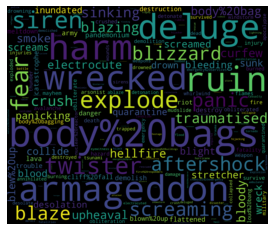

In [19]:
#Wordcloud de False keys en base a su ocurrencia
wordcloud = WordCloud(width=3000,height=2500, max_words= len(freqFalseKeys),relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freqFalseKeys)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

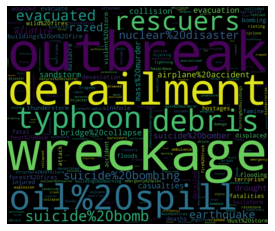

In [15]:
#Wordcloud de True keys en base a su ocurrencia
wordcloud = WordCloud(width=3000,height=2500, max_words=len(freqTrueKeys),relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freqTrueKeys)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()